In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint
from ipywidgets import interact,fixed
from functools import partial

## Phase Space Vizualization in 1D

State Space :

$$ X = \begin{pmatrix} x \\ v \end{pmatrix}$$

and the phase space dynamics are :

$$ \partial _t \begin{pmatrix} x \\ v \end{pmatrix} = \begin{pmatrix} v \\ \frac{F}{m} \end{pmatrix} $$


__General ODE Integration__

In [3]:
def phasespaceplot(func,tmax=10,args=(),plot_size=2,Nparticles=100) :
    x0arr,v0arr = np.random.random(Nparticles)*2-1,np.random.random(Nparticles)*2-1
    t = np.linspace(0,tmax,tmax*10)
    plt.figure(figsize=(10,10))
    plt.xlim([-plot_size,plot_size])
    plt.ylim([-plot_size,plot_size])
    plt.xlabel("x")
    plt.ylabel("v")
    for x0,v0 in zip(x0arr,v0arr) :
        sol = odeint(func,(x0,v0),t,args)
        plt.scatter(x0,v0,color="black")
        plt.plot(sol[:, 0], sol[:, 1],linewidth=0.8)

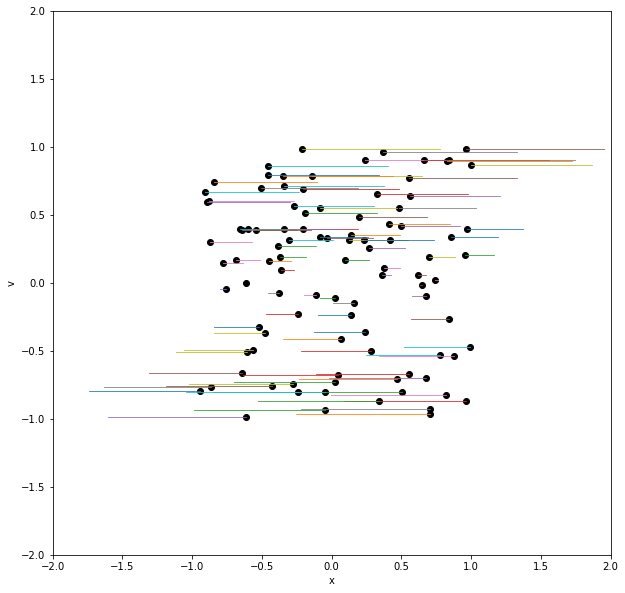

In [4]:
def force_free(state,t) : 
    x,v = state
    return v,0
phasespaceplot(force_free,tmax=1)

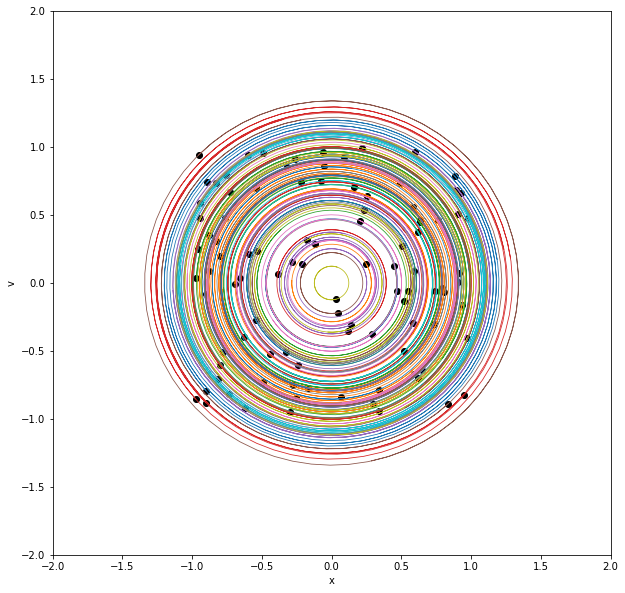

In [5]:
def shm(state,t,omega) : 
    x,v = state
    return v, -omega**2*x
phasespaceplot(shm,tmax=10,args=(1,))

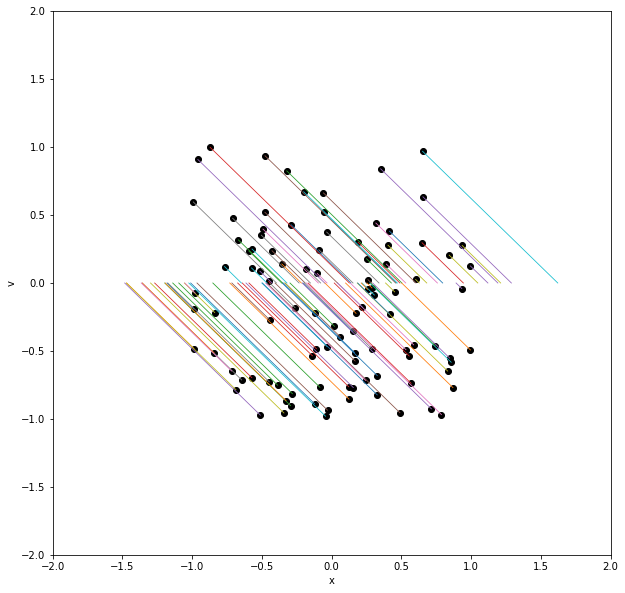

In [6]:
def damping(state,t,k) : 
    x,v = state
    return v, -k*v
phasespaceplot(damping,tmax=10,args=(1.,))

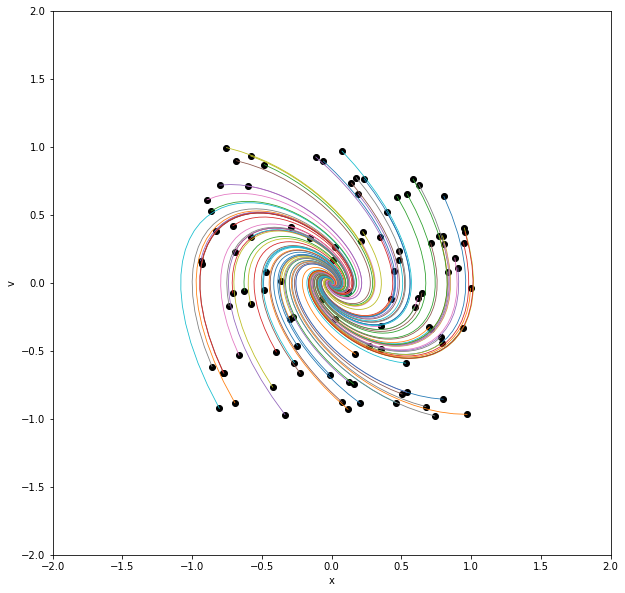

In [7]:
def damped_shm(state,t,k,omega) : 
    x,v = state
    return v, -k*v-omega**2*x
phasespaceplot(damped_shm,tmax=10,args=(1.0,1.0))

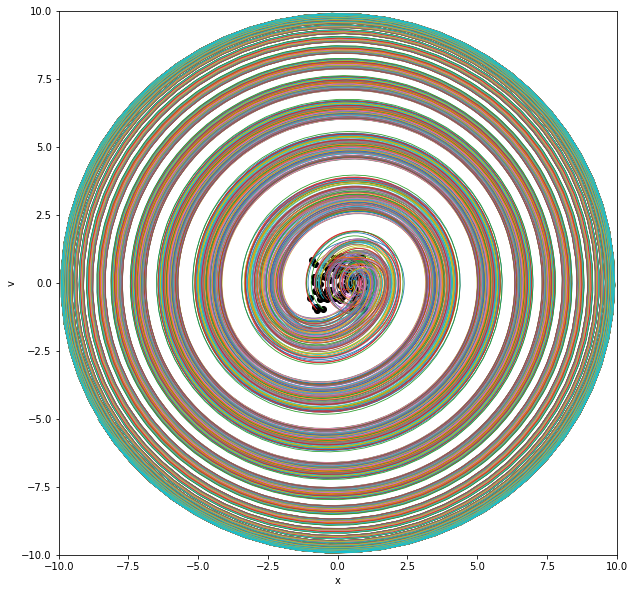

In [8]:
def driven_damped_shm(state,t,k,omega,omega_drive) : 
    x,v = state
    return v, -omega**2*x-k*v + np.sin(omega_drive*t)
phasespaceplot(driven_damped_shm,tmax=100,args=(0.1,1.0,1.0),plot_size=10)

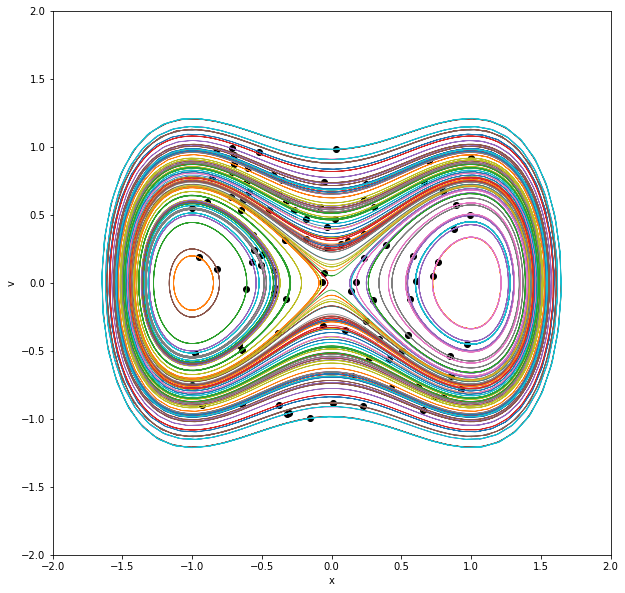

In [9]:
def potential_well(state,t,k) :
    x,v=state
    return v, x-k*x**3
phasespaceplot(potential_well,tmax=20,args=(1.0,),plot_size=2)

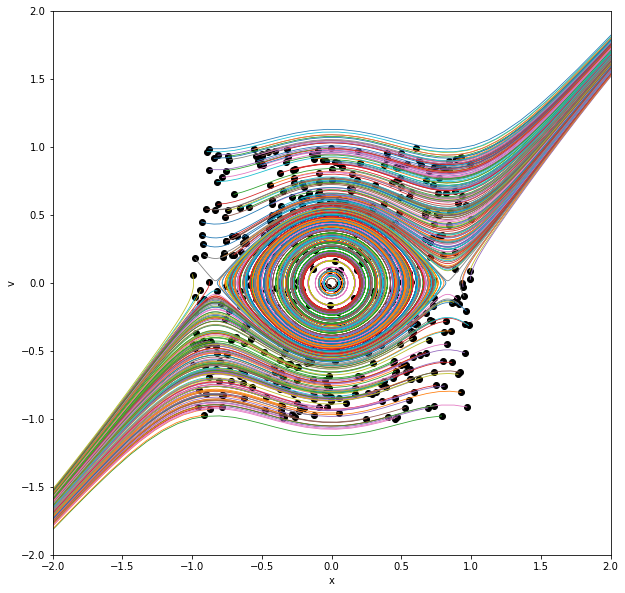

In [10]:
def potential_milo(state,t,k) :
    x,v=state
    return v, x-2*k*x*np.exp(-k*x**2)
phasespaceplot(potential_milo,tmax=20,args=(1.0,),plot_size=2,Nparticles=500)

## Phase Space Vizualization in 3D

In [11]:
def phasespace6d(func,tmax=1,tsteps=10,args=(),Nparticles=10) :
    x0arr,v0arr = (np.array([np.random.random(Nparticles)*2-1 for i in [0,1,2]]).T,
                   np.array([np.random.random(Nparticles)*2-1 for i in [0,1,2]]).T
                  )
    xv = []
    t = np.linspace(0,tmax,tsteps)
    for x0,v0 in zip(x0arr,v0arr) : 
        sol = odeint(func,tuple(x0)+tuple(v0),t,args)
        xv.append(sol)
    return xv,x0arr,v0arr

def plot6D(xv,x0arr,v0arr,xplot_size=2,vplot_size=2,theta_view_x=30,phi_view_x=30,theta_view_v=30,phi_view_v=30) :
    plt.figure(figsize=(20,10))
    ax_x = plt.subplot(121,projection='3d')
    ax_v = plt.subplot(122,projection='3d')
    for ax,plot_size in zip([ax_x,ax_v],[xplot_size,vplot_size]) :
        ax.set_xlim([-plot_size,plot_size])
        ax.set_ylim([-plot_size,plot_size])
        ax.set_zlim([-plot_size,plot_size])
    ax_x.set_title("Position",fontsize=17)
    ax_x.set_xlabel("x")
    ax_x.set_ylabel("y")
    ax_x.set_zlabel("z")
    ax_v.set_title("Velocity",fontsize=17)
    ax_v.set_xlabel("$v_x$")
    ax_v.set_ylabel("$v_y$")
    ax_v.set_zlabel("$v_z$")
    for sol,x0,v0 in zip(xv,x0arr,v0arr) : 
        ax_x.plot(sol[:,0],sol[:,1],sol[:,2],linewidth=0.8)
        ax_x.scatter(*tuple(x0),color="black")
        ax_v.plot(sol[:,3],sol[:,4],sol[:,5],linewidth=0.8)
        ax_v.scatter(*tuple(v0),color="black")
    ax_x.view_init(theta_view_x,phi_view_x)
    ax_v.view_init(theta_view_v,phi_view_v)
    
def plot6D_interact(xv,x0arr,v0arr,xps=2,vps=2,interactive=True,twoDproj=False) :
    if interactive :
        interact(plot6D,xv=fixed(xv),x0arr=fixed(x0arr),v0arr=fixed(v0arr),xplot_size=fixed(xps),vplot_size=fixed(vps),
                 theta_view_x=(0,180,30),phi_view_x=(0,360,30),theta_view_v=(0,180,30),phi_view_v=(0,360,30))
    elif twoDproj : plot6D(xv,x0arr,v0arr,xplot_size=xps,vplot_size=vps,theta_view_x = 90,phi_view_x = 0)
    else : plot6D(xv,x0arr,v0arr,xplot_size=xps,vplot_size=vps)

### Force Free

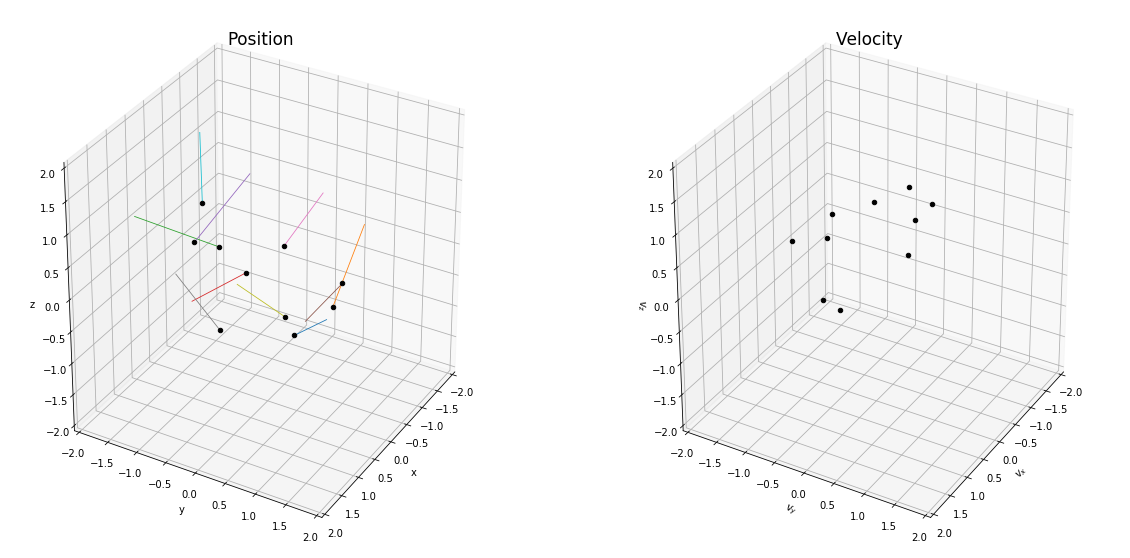

In [12]:
def forcefree(state,t) : 
    x,y,z,vx,vy,vz=state
    return vx,vy,vz,0,0,0
plot6D_interact(*phasespace6d(forcefree),interactive=False)

### Lorentz Force

$$ \boldsymbol{F}_q = q\boldsymbol{E} +q\boldsymbol{v}\times\boldsymbol{B} $$

Let's set $\boldsymbol{E} = 0$ and $\boldsymbol{B} = B_0 \hat{z}$

Then the equation of motion for a particle of charge $q$, mass $m$: 

$$\partial_t
\begin{pmatrix}
x \\
y\\
z\\
v_x\\
v_y\\
v_z
\end{pmatrix} =
\begin{pmatrix}
v_x \\
v_y\\
v_z\\
\frac{qB_0}{m}v_y\\
-\frac{qB_0}{m}v_x\\
0
\end{pmatrix}
$$

Define the __gyrofrequency__ :

$$
\omega_0 = \frac{qB_0}{m}
$$

which is a signed quantity.

In [13]:
def uniform_Bz(state,t,omega_0) : 
    x,y,z,vx,vy,vz=state
    return vx,vy,vz,omega_0*vy,-omega_0*vx,0
xv,x0arr,v0arr = phasespace6d(uniform_Bz,tmax=5,tsteps=100,args=(5,),Nparticles=20)
plot6D_interact(xv,x0arr,v0arr,interactive=True)

interactive(children=(IntSlider(value=30, description='theta_view_x', max=180, step=30), IntSlider(value=30, d…

### E $\times$ B drift

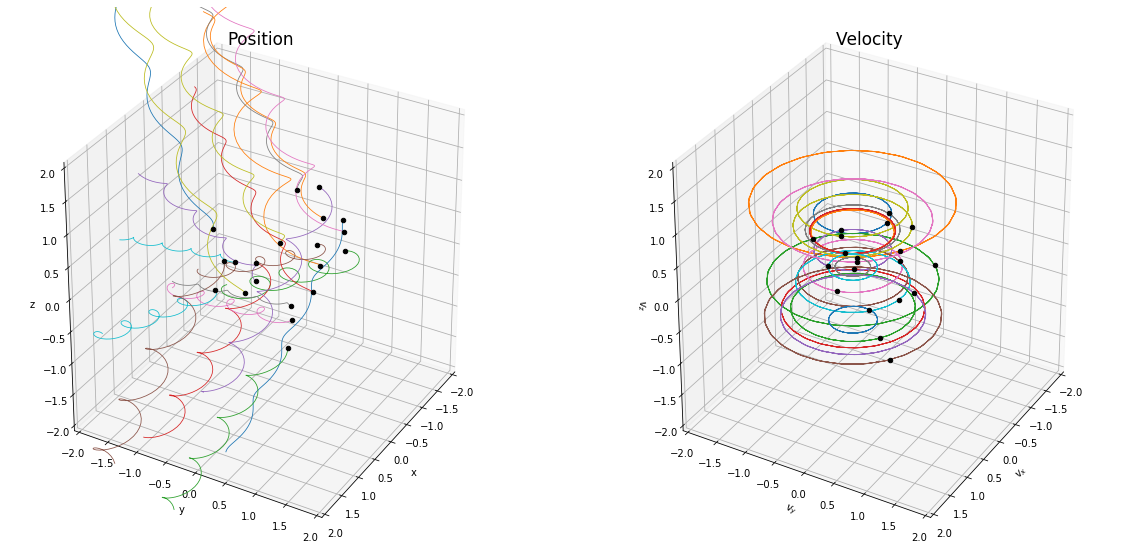

In [10]:
def ExB(state,t,omega_0,E) : 
    x,y,z,vx,vy,vz=state
    return vx,vy,vz,E+omega_0*vy,-omega_0*vx,0
xv,x0arr,v0arr=phasespace6d(ExB,tmax=5,tsteps=100,args=(5,2),Nparticles=20)
plot6D_interact(xv,x0arr,v0arr,interactive=False)

### Field Aligned Current

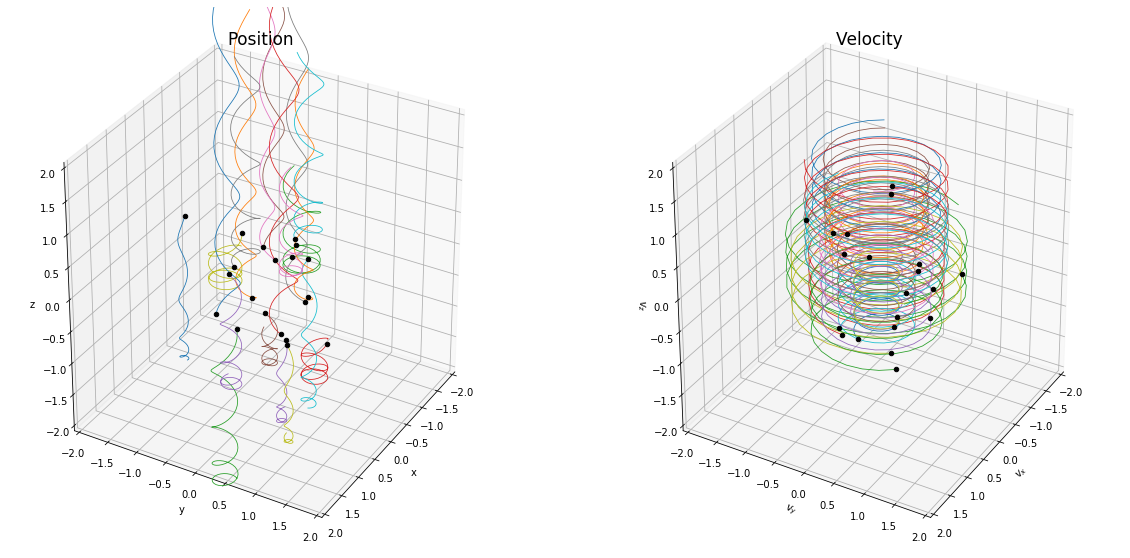

In [14]:
def FAC(state,t,omega_0,E) : 
    x,y,z,vx,vy,vz=state
    return vx,vy,vz,omega_0*vy,-omega_0*vx,E
xv,x0arr,v0arr=phasespace6d(FAC,tmax=5,tsteps=100,args=(5,2/10),Nparticles=20)
plot6D_interact(xv,x0arr,v0arr,interactive=False)

### Magnetic Bottles

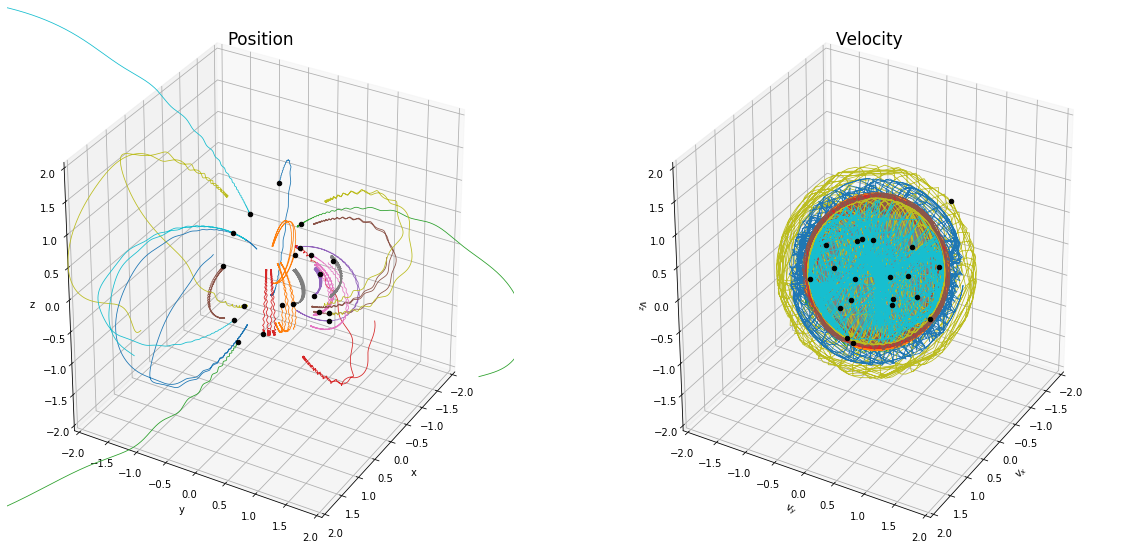

In [15]:
# Single Magnetic Dipole
def mag_dipole(state,t,mu) :
    x,y,z,vx,vy,vz=state
    r = (x**2+y**2+z**2)**0.5
    # http://bolvan.ph.utexas.edu/~vadim/Classes/18f/dipole.pdf eqn 6
    Bx = mu*3*x*z/r**5
    By = mu*3*y*z/r**5
    Bz = mu*(2*z**2-x**2-y**2)/r**5
    vxdot,vydot,vzdot = np.cross(np.array([vx,vy,vz]),np.array([Bx,By,Bz]))
    return vx,vy,vz,vxdot,vydot,vzdot
xv,x0arr,v0arr=phasespace6d(mag_dipole,tmax=10,tsteps=2000,args=(100,),Nparticles=20)
plot6D_interact(xv,x0arr,v0arr,interactive=False)

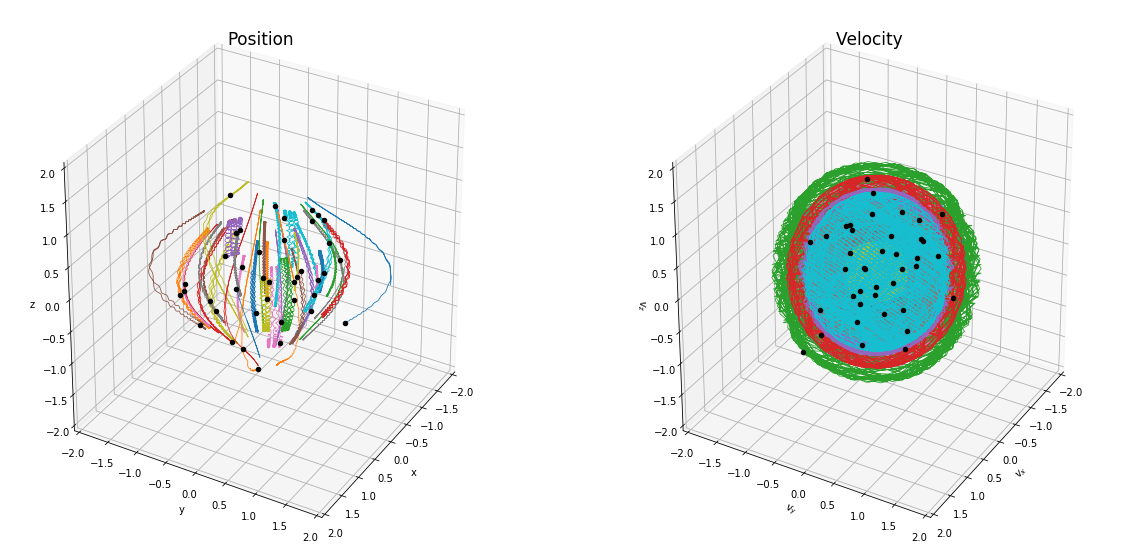

In [16]:
# 2 dipoles separated along z axis with same N-S direction
def mag_bottle(state,t,mu,zs) :
    x,y,z,vx,vy,vz=state
    r = (x**2+y**2+z**2)**0.5
    # http://bolvan.ph.utexas.edu/~vadim/Classes/18f/dipole.pdf eqn 6
    Bx1 = mu*3*x*(z+zs)/(x**2+y**2+(z+zs)**2)**2.5
    By1 = mu*3*y*(z+zs)/(x**2+y**2+(z+zs)**2)**2.5
    Bz1 = mu*(2*(z+zs)**2-x**2-y**2)/(x**2+y**2+(z+zs)**2)**2.5
    Bx2 = mu*3*x*(z-zs)/(x**2+y**2+(z-zs)**2)**2.5
    By2 = mu*3*y*(z-zs)/(x**2+y**2+(z-zs)**2)**2.5
    Bz2 = mu*(2*(z-zs)**2-x**2-y**2)/(x**2+y**2+(z-zs)**2)**2.5
    vxdot,vydot,vzdot = np.cross(np.array([vx,vy,vz]),np.array([Bx1+Bx2,
                                                                By1+By2,
                                                                Bz1+Bz2]))
    return vx,vy,vz,vxdot,vydot,vzdot
xv,x0arr,v0arr=phasespace6d(mag_bottle,tmax=10,tsteps=1000,args=(200,2),Nparticles=40)
plot6D_interact(xv,x0arr,v0arr,interactive=False)

In [17]:
# 2 dipoles separated along z axis with reverse direction -quadrupole
def mag_expulsion(state,t,mu,zs) :
    x,y,z,vx,vy,vz=state
    r = (x**2+y**2+z**2)**0.5
    # http://bolvan.ph.utexas.edu/~vadim/Classes/18f/dipole.pdf eqn 6
    Bx1 = -mu*3*x*(z+zs)/(x**2+y**2+(z+zs)**2)**2.5
    By1 = -mu*3*y*(z+zs)/(x**2+y**2+(z+zs)**2)**2.5
    Bz1 = -mu*(2*(z+zs)**2-x**2-y**2)/(x**2+y**2+(z+zs)**2)**2.5
    Bx2 = mu*3*x*(z-zs)/(x**2+y**2+(z-zs)**2)**2.5
    By2 = mu*3*y*(z-zs)/(x**2+y**2+(z-zs)**2)**2.5
    Bz2 = mu*(2*(z-zs)**2-x**2-y**2)/(x**2+y**2+(z-zs)**2)**2.5
    vxdot,vydot,vzdot = np.cross(np.array([vx,vy,vz]),np.array([Bx1+Bx2,
                                                                By1+By2,
                                                                Bz1+Bz2]))
    return vx,vy,vz,vxdot,vydot,vzdot
xv,x0arr,v0arr=phasespace6d(mag_expulsion,tmax=10,tsteps=1000,args=(200,2),Nparticles=20)
plot6D_interact(xv,x0arr,v0arr,interactive=True,xps=10)

interactive(children=(IntSlider(value=30, description='theta_view_x', max=180, step=30), IntSlider(value=30, d…

### Parker Spiral and Demo of Slowly-Varying Magnetic Field Curvature

In [18]:
def xyz2rthphi(x,y,z) :
    '''
    Example :
    =========
    >>> xyz2rthphi(0,0,-1)
    Out[1]: (1.0, 3.141592653589793, 0.0)
    '''
    r = np.sqrt(x**2+y**2+z**2)
    th = np.arccos(z/r)
    phi = np.arctan2(y,x)
    return r, th, phi

def vecSPH2vecCART(vec_SPH,theta,phi):
    '''
    In :
    ====
    vec_SPH - vector, np.array([vecr,vecth,vecphi]) 
              expressed in polar coordinates at polar locus (theta,phi)
    theta,phi - [rad],[rad], angular position at which vec is expressed 
    
    (physics convention : theta = latitudinal,phi = longitudinal)
    
    Out :
    =====
    vec_CART - np.array([vecx,vecy,vecz])
    
    Example :
    =========
    >>> vec_SPH = np.array([1,0,0])
    >>> vecSPH2vecCART(vec_SPH,np.radians(90),-np.radians(90))
    Out[1] : array([ 6.123234e-17, -1.000000e+00,  6.123234e-17])
    '''
    sth,cth = np.sin(theta),np.cos(theta)
    sphi,cphi = np.sin(phi),np.cos(phi)
    rot = np.array([[sth*cphi,cth*cphi, -sphi],
                    [sth*sphi,cth*sphi,  cphi],
                    [    cth,     -sth,     0]
                   ])
    vec_CART = np.dot(rot,vec_SPH)
    vec_CART[np.abs(vec_CART)<1e-16]= 0.0
    return vec_CART

In [19]:
def B_spiral(state,t,vsw,B_0) :
    x,y,z,vx,vy,vz=state
    r,th,ph = xyz2rthphi(x,y,z) #[x],[radians],[radians]
    omega_solar = 1 # solar rotation rate
    Br = B_0*r**-2
    Bth = 0
    Bphi = -omega_solar/vsw*r*np.sin(th)*Br
    Bx,By,Bz = vecSPH2vecCART(np.array([Br,Bth,Bphi]),th,ph)
    vxdot,vydot,vzdot = np.cross(np.array([vx,vy,vz]),
                                 np.array([Bx,By,Bz]))
    return vx,vy,vz,vxdot,vydot,vzdot

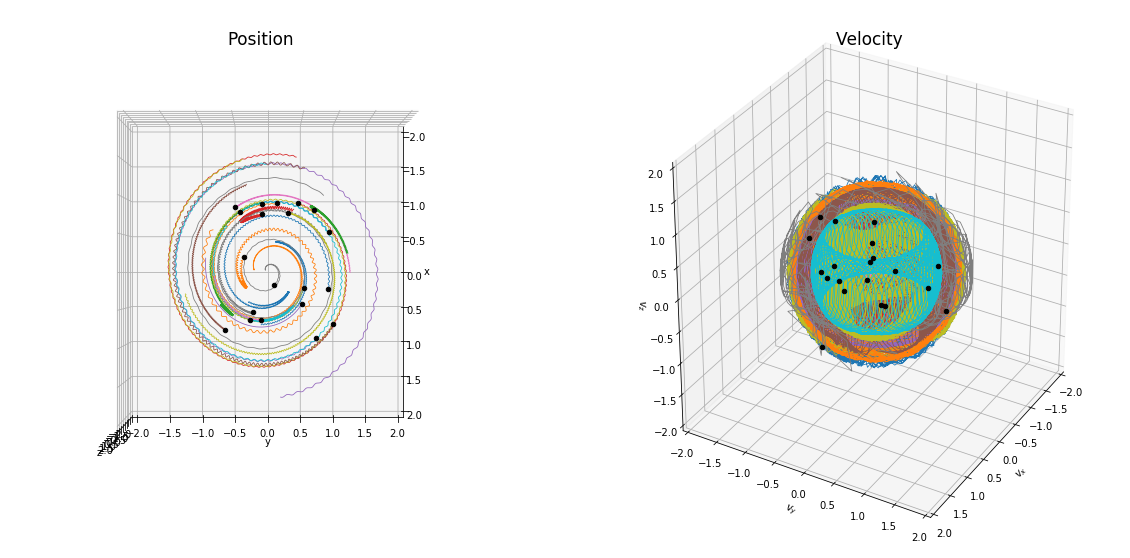

In [20]:
# Gyrolength << spiral curvature  - Guiding Center approximation is Good
xv1,x0arr1,v0arr1=phasespace6d(B_spiral,tmax=10,tsteps=1000,args=(0.1,10),Nparticles=20)
plot6D_interact(xv1,x0arr1,v0arr1,interactive=False,twoDproj=True,xps=2)

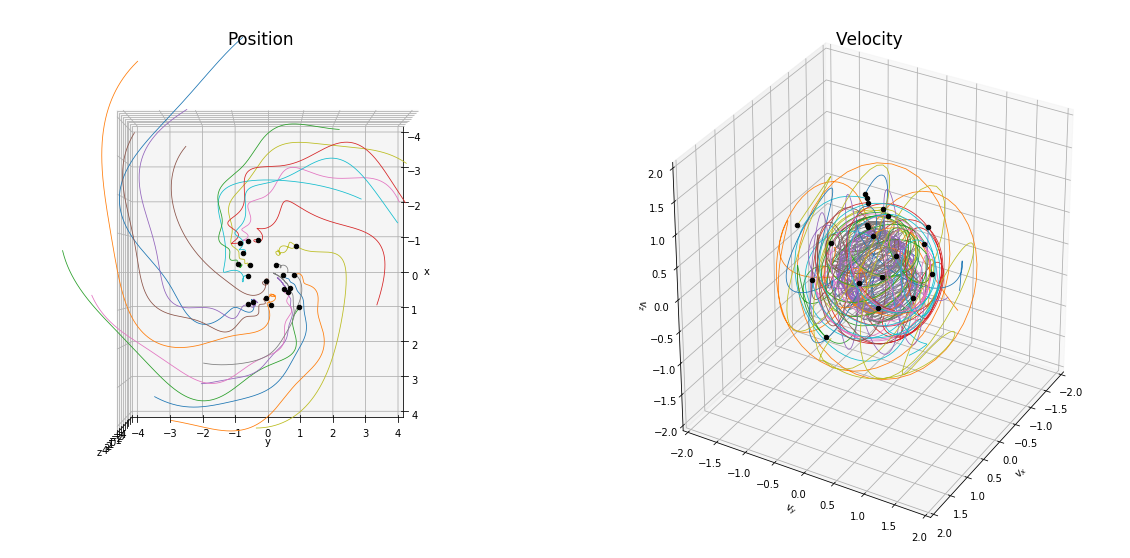

In [23]:
# Gyrolength and spiral curvature of similar scales - Guiding Center Approximation Marginal
xv2,x0arr2,v0arr2=phasespace6d(B_spiral,tmax=10,tsteps=1000,args=(2,10),Nparticles=20)
plot6D_interact(xv2,x0arr2,v0arr2,interactive=False,twoDproj=True,xps=4)

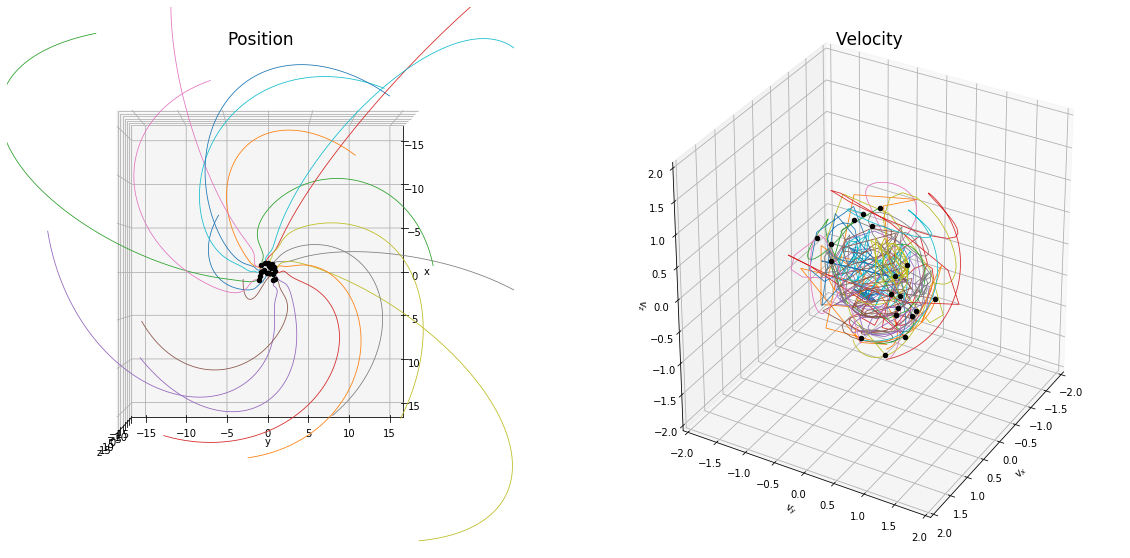

In [24]:
# Gyrolength and spiral curvature of similar scales - Guiding Center Approximation Poor close in where the gyromotion is large
xv3,x0arr3,v0arr3=phasespace6d(B_spiral,tmax=100,tsteps=1000,args=(10,10),Nparticles=20)
plot6D_interact(xv3,x0arr3,v0arr3,interactive=False,twoDproj=True,xps=16)

### Particle Acceleration - 2$^{\text{nd}}$ Adiabatic Invariant

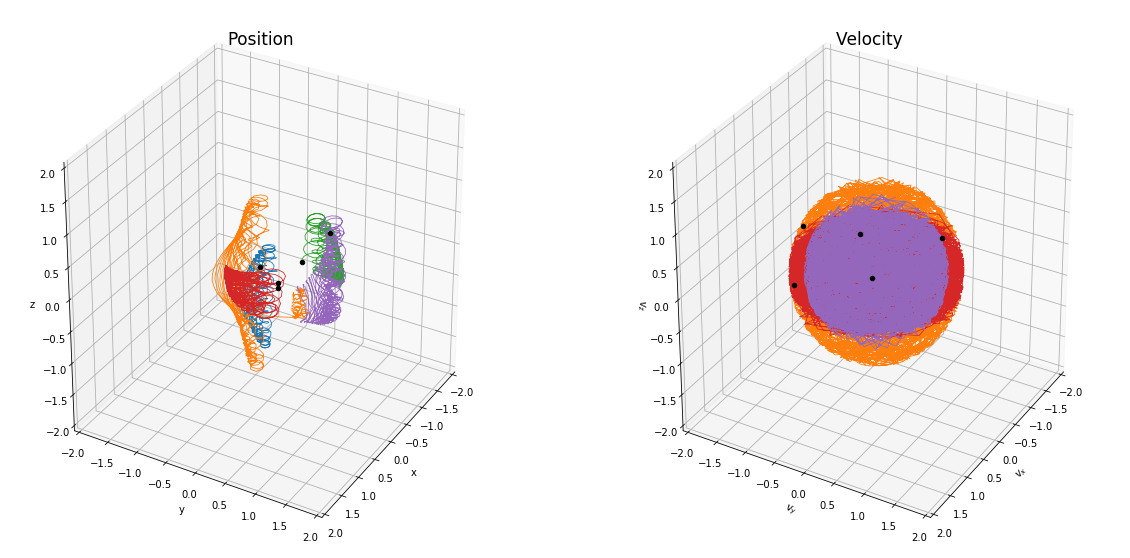

In [55]:
# 2 dipoles separated along z axis with same N-S direction, moving together in time
def mag_bottle_moving(state,t,mu,zsdot) :
    x,y,z,vx,vy,vz=state
    r = (x**2+y**2+z**2)**0.5
    zs = 5-zsdot*t
    # http://bolvan.ph.utexas.edu/~vadim/Classes/18f/dipole.pdf eqn 6
    Bx1 = mu*3*x*(z+zs)/(x**2+y**2+(z+zs)**2)**2.5
    By1 = mu*3*y*(z+zs)/(x**2+y**2+(z+zs)**2)**2.5
    Bz1 = mu*(2*(z+zs)**2-x**2-y**2)/(x**2+y**2+(z+zs)**2)**2.5
    Bx2 = mu*3*x*(z-zs)/(x**2+y**2+(z-zs)**2)**2.5
    By2 = mu*3*y*(z-zs)/(x**2+y**2+(z-zs)**2)**2.5
    Bz2 = mu*(2*(z-zs)**2-x**2-y**2)/(x**2+y**2+(z-zs)**2)**2.5
    vxdot,vydot,vzdot = np.cross(np.array([vx,vy,vz]),np.array([Bx1+Bx2,
                                                                By1+By2,
                                                                Bz1+Bz2]))
    return vx,vy,vz,vxdot,vydot,vzdot
xv,x0arr,v0arr=phasespace6d(mag_bottle_moving,tmax=80,tsteps=1000,args=(200,0.05),Nparticles=5)
plot6D_interact(xv,x0arr,v0arr,interactive=False,twoDproj=False)

Text(0, 0.5, 'Velocity in z direction')

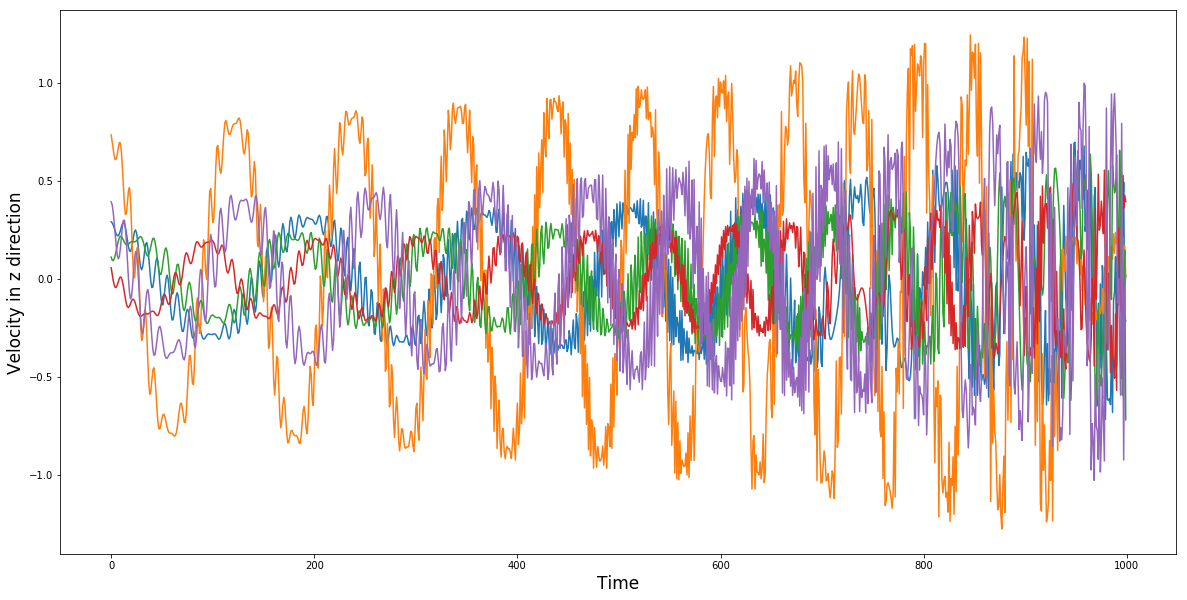

In [56]:
plt.figure(figsize=(20,10))
for arr in xv :
    if np.max(arr) < 1e1 :
        plt.plot(arr[:,5])
        
plt.xlabel("Time",fontsize=17)
plt.ylabel("Velocity in z direction",fontsize=17)

### Relativistic Phase Space Bunching

In [21]:
def ExB(state,t,omega_0,E) : 
    x,y,z,vx,vy,vz=state
    B = np.a
    return vx,vy,vz,E+omega_0*vy,-omega_0*vx,0
xv,x0arr,v0arr=phasespace6d(ExB,tmax=5,tsteps=100,args=(5,2),Nparticles=20)
plot6D_interact(xv,x0arr,v0arr,interactive=False)

AttributeError: module 'numpy' has no attribute 'a'

### Gravitation

#### Point Mass

$$\boldsymbol{a_G} = -\frac{GM}{(x^2+y^2+z^2)^\frac{3}{2}}\begin{pmatrix} x \\ y \\ z \end{pmatrix} $$

In [22]:
GMreal = 3.986004418e14 #m^3/s^3
def gravity_pointmass(state,t,GM = 1) : 
    x,y,z,vx,vy,vz=state
    r = (x**2+y**2+z**2)**0.5
    return vx,vy,vz,-GM*x/r**3,-GM*y/r**3,-GM*z/r**3
xv,x0arr,v0arr =phasespace6d(gravity_pointmass,tmax=50
                ,tsteps=100000,args=(1,),Nparticles=10)
plot6D_interact(xv,x0arr,v0arr)

interactive(children=(IntSlider(value=30, description='theta_view_x', max=180, step=30), IntSlider(value=30, d…

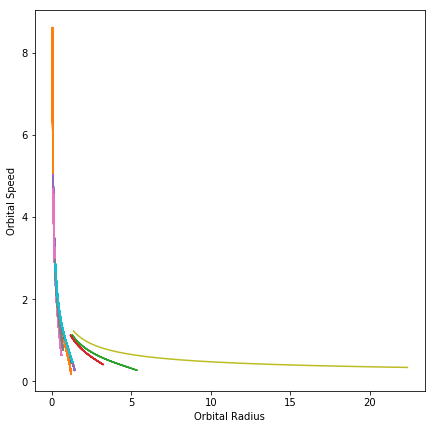

In [23]:
plt.figure(figsize=(7,7))
for xv_ in xv :
    r,v = np.linalg.norm(xv_[:,0:3],axis=1),np.linalg.norm(xv_[:,3:6],axis=1)
    plt.plot(r,v)
    plt.xlabel("Orbital Radius")
    plt.ylabel("Orbital Speed")